<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/GIS_A2_KMeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame, read_file

In [3]:
nama='ACEH_UTARA.zip'
kab=gpd.read_file(nama)
kab.head()

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,...,PERANG_,KEPALA_,BIARAW_,WIRASWAST_,LAINNYA_12,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,geometry
0,3430.0,1108072039,UJUNG KUTA BATEE,110807.0,ACEH,ACEH UTARA,MEURAH MULIA,UJUNG KUTA BATEE,543.0,166.0,...,0.0,0.0,0.0,34.0,0.0,3429.0,1108072039,UJUNG KUTA BATEE,110807.0,"POLYGON ((97.20231 5.04577, 97.20255 5.04009, ..."
1,3134.0,1108012002,MNSH ALUE I PUTEH,110801.0,ACEH,ACEH UTARA,BAKTIYA,MNSH ALUE I PUTEH,1981.0,560.0,...,1.0,0.0,0.0,196.0,0.0,3133.0,1108012002,MNSH ALUE I PUTEH,110801.0,"POLYGON ((97.41614 5.13395, 97.41597 5.13231, ..."
2,3135.0,1108012003,PUCOK ALUE,110801.0,ACEH,ACEH UTARA,BAKTIYA,PUCOK ALUE,682.0,202.0,...,0.0,0.0,0.0,34.0,0.0,3134.0,1108012003,PUCOK ALUE,110801.0,"POLYGON ((97.41536 5.12693, 97.4154 5.12465, 9..."
3,3136.0,1108012004,ALUE ANOU TIMU,110801.0,ACEH,ACEH UTARA,BAKTIYA,ALUE ANOU TIMU,700.0,216.0,...,0.0,0.0,0.0,40.0,0.0,3135.0,1108012004,ALUE ANOU TIMU,110801.0,"POLYGON ((97.42424 5.14849, 97.42339 5.14802, ..."
4,3155.0,1108012023,ALUE DAMA,110801.0,ACEH,ACEH UTARA,BAKTIYA,ALUE DAMA,576.0,161.0,...,0.0,0.0,0.0,34.0,0.0,3154.0,1108012023,ALUE DAMA,110801.0,"POLYGON ((97.43952 5.12801, 97.43911 5.12695, ..."


In [4]:
kab['KECAMATAN'].value_counts()

,count
KECAMATAN,
LHOKSUKON,75
BAKTIYA,57
TANAH LUAS,57
MEURAH MULIA,50
MATANGKULI,49
T. JAMBO AYE,47
SAMUDERA,40
PAYA BAKONG,39
SAWANG,39


In [5]:
import pandas as pd
penduduk=pd.read_excel('lat1.xlsx')
penduduk.head()

,KECAMATAN,PENDUDUK,PENDAPATAN
0,LHOKSUKON,250,1000000
1,BAKTIYA,120,1000200
2,TANAH LUAS,123,1000400
3,MEURAH MULIA,126,1000600
4,MATANG KULI,129,1000800


          KECAMATAN  PENDUDUK  PENDAPATAN  Cluster
0         LHOKSUKON       250     1000000        2
1           BAKTIYA       120     1000200        0
2        TANAH LUAS       123     1000400        0
3      MEURAH MULIA       126     1000600        0
4       MATANG KULI       129     1000800        0
5      T. JAMBO AYE       132     1001000        0
6          SAMUDERA       135     1001200        0
7       PAYA BAKONG       138     1001400        0
8            SAWANG       141     1001600        4
9       KUTA MAKMUR       144     1001800        4
10  SYAMTALIRA BAYU       147     1002000        4
11  SYAMTALIRA ARON       150     1002200        4
12        SEUNUDDON       153     1002400        4
13            NISAM       156     1002600        4
14    BAKTIYA BARAT       159     1002800        1
15        COT GIREK       162     1003000        1
16       MUARA BATU       165     1003200        1
17      PIRAK TIMUR       168     1003400        1
18        LANGKAHAN       171  

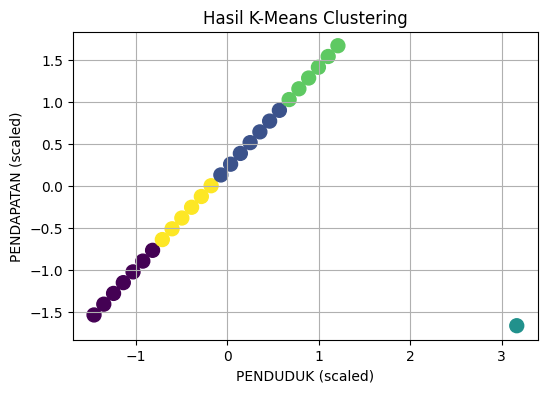

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Pilih fitur numerik
features = ['PENDUDUK', 'PENDAPATAN']
X = penduduk[features]

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan KMeans dengan jumlah klaster = 5 (bisa disesuaikan)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
penduduk['Cluster'] = kmeans.fit_predict(X_scaled)

# Tampilkan hasil klaster
hasil=penduduk[['KECAMATAN', 'PENDUDUK', 'PENDAPATAN', 'Cluster']]
print(penduduk[['KECAMATAN', 'PENDUDUK', 'PENDAPATAN', 'Cluster']])

# Visualisasi klaster
plt.figure(figsize=(6, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=penduduk['Cluster'], cmap='viridis', s=100)
plt.xlabel('PENDUDUK (scaled)')
plt.ylabel('PENDAPATAN (scaled)')
plt.title('Hasil K-Means Clustering')
plt.grid(True)
plt.show()


In [11]:
X_scaled

array([[ 3.16378907, -1.66904592],
       [-1.45363282, -1.54065777],
       [-1.34707693, -1.41226963],
       [-1.24052104, -1.28388148],
       [-1.13396515, -1.15549333],
       [-1.02740926, -1.02710518],
       [-0.92085337, -0.89871703],
       [-0.81429748, -0.77032889],
       [-0.70774159, -0.64194074],
       [-0.6011857 , -0.51355259],
       [-0.49462981, -0.38516444],
       [-0.38807392, -0.2567763 ],
       [-0.28151803, -0.12838815],
       [-0.17496214,  0.        ],
       [-0.06840625,  0.12838815],
       [ 0.03814964,  0.2567763 ],
       [ 0.14470553,  0.38516444],
       [ 0.25126142,  0.51355259],
       [ 0.35781731,  0.64194074],
       [ 0.4643732 ,  0.77032889],
       [ 0.57092909,  0.89871703],
       [ 0.67748498,  1.02710518],
       [ 0.78404087,  1.15549333],
       [ 0.89059676,  1.28388148],
       [ 0.99715265,  1.41226963],
       [ 1.10370854,  1.54065777],
       [ 1.21026443,  1.66904592]])

In [7]:
penduduk.head()

,KECAMATAN,PENDUDUK,PENDAPATAN,Cluster
0,LHOKSUKON,250,1000000,2
1,BAKTIYA,120,1000200,0
2,TANAH LUAS,123,1000400,0
3,MEURAH MULIA,126,1000600,0
4,MATANG KULI,129,1000800,0


In [8]:
#-- merger ke QGIS --
kab1=kab.merge(penduduk, on='KECAMATAN', how='left')
kab1.head()

,OBJECT_ID,KODE_DESA,DESA,KODE,PROVINSI,KAB_KOTA,KECAMATAN,DESA_KELUR,JUMLAH_PEN,JUMLAH_KK,...,WIRASWAST_,LAINNYA_12,LUAS_DESA,KODE_DES_3,DESA_KEL_1,KODE_12,geometry,PENDUDUK,PENDAPATAN,Cluster
0,3430.0,1108072039,UJUNG KUTA BATEE,110807.0,ACEH,ACEH UTARA,MEURAH MULIA,UJUNG KUTA BATEE,543.0,166.0,...,34.0,0.0,3429.0,1108072039,UJUNG KUTA BATEE,110807.0,"POLYGON ((97.20231 5.04577, 97.20255 5.04009, ...",126.0,1000600.0,0.0
1,3134.0,1108012002,MNSH ALUE I PUTEH,110801.0,ACEH,ACEH UTARA,BAKTIYA,MNSH ALUE I PUTEH,1981.0,560.0,...,196.0,0.0,3133.0,1108012002,MNSH ALUE I PUTEH,110801.0,"POLYGON ((97.41614 5.13395, 97.41597 5.13231, ...",120.0,1000200.0,0.0
2,3135.0,1108012003,PUCOK ALUE,110801.0,ACEH,ACEH UTARA,BAKTIYA,PUCOK ALUE,682.0,202.0,...,34.0,0.0,3134.0,1108012003,PUCOK ALUE,110801.0,"POLYGON ((97.41536 5.12693, 97.4154 5.12465, 9...",120.0,1000200.0,0.0
3,3136.0,1108012004,ALUE ANOU TIMU,110801.0,ACEH,ACEH UTARA,BAKTIYA,ALUE ANOU TIMU,700.0,216.0,...,40.0,0.0,3135.0,1108012004,ALUE ANOU TIMU,110801.0,"POLYGON ((97.42424 5.14849, 97.42339 5.14802, ...",120.0,1000200.0,0.0
4,3155.0,1108012023,ALUE DAMA,110801.0,ACEH,ACEH UTARA,BAKTIYA,ALUE DAMA,576.0,161.0,...,34.0,0.0,3154.0,1108012023,ALUE DAMA,110801.0,"POLYGON ((97.43952 5.12801, 97.43911 5.12695, ...",120.0,1000200.0,0.0


<Axes: >

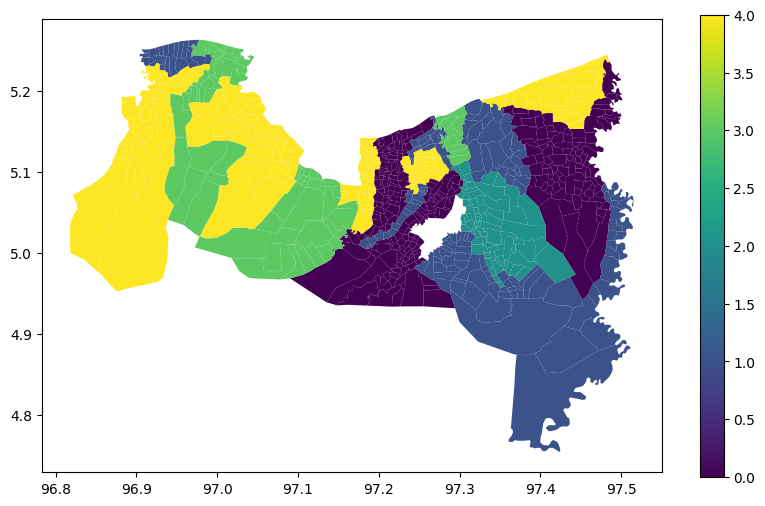

In [10]:
kab1.plot(column='Cluster', cmap='viridis', legend=True, figsize=(10, 6))